In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
pkmn_sales = pd.read_csv('./data/vgchartz_pokemon_sales.csv')
pkmn_sales.info()
pkmn_sales.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game_id        61 non-null     int64  
 1   title          61 non-null     object 
 2   console        61 non-null     object 
 3   publisher      61 non-null     object 
 4   critic_score   37 non-null     float64
 5   total_shipped  42 non-null     object 
 6   release_date   61 non-null     object 
 7   last_update    25 non-null     object 
 8   game_url       61 non-null     object 
 9   japan_sales    54 non-null     float64
 10  na_sales       54 non-null     float64
 11  europe_sales   54 non-null     float64
 12  others_sales   54 non-null     float64
 13  total_units    61 non-null     float64
dtypes: float64(6), int64(1), object(7)
memory usage: 6.8+ KB


,game_id,title,console,publisher,critic_score,total_shipped,release_date,last_update,game_url,japan_sales,na_sales,europe_sales,others_sales,total_units
count,61.000000,61,61,61,37.000000,42,61,25,61,54.000000,54.000000,54.000000,54.000000,61.000000
unique,NaN,60,10,2,NaN,42,55,14,61,NaN,NaN,NaN,NaN,NaN
top,NaN,Pokémon Crystal Version,DS,Nintendo,NaN,9.23m,18th Sep 06,03rd Aug 18,https://www.vgchartz.com/game/181292/pokemon-u...,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,15,60,NaN,1,3,9,1,NaN,NaN,NaN,NaN,NaN
mean,57165.901639,NaN,NaN,NaN,7.470270,NaN,NaN,NaN,NaN,1.567593,2.003333,1.290741,0.254259,6.207049
std,77643.702949,NaN,NaN,NaN,1.275815,NaN,NaN,NaN,NaN,2.142878,2.525923,1.914612,0.348877,7.752522
min,1760.000000,NaN,NaN,NaN,5.200000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4024.000000,NaN,NaN,NaN,6.500000,NaN,NaN,NaN,NaN,0.292500,0.217500,0.052500,0.010000,0.770000
50%,23893.000000,NaN,NaN,NaN,7.800000,NaN,NaN,NaN,NaN,0.640000,0.795000,0.375000,0.075000,2.150000
75%,74528.000000,NaN,NaN,NaN,8.600000,NaN,NaN,NaN,NaN,2.427500,2.782500,1.692500,0.392500,10.490000


In [17]:
#check for dupes
pkmn_sales[pkmn_sales['title'].duplicated(keep=False)]
#drop crystal 3ds virtual rerelease with incomplete data
pkmn_sales = pkmn_sales[pkmn_sales['game_id'] != 220575].reset_index(drop=True)

In [20]:
sales_cols = ['japan_sales', 'na_sales', 'europe_sales', 'others_sales', 'total_units']

for col in sales_cols:
    pkmn_sales[col] = (pkmn_sales[col]
        .astype(str)                      # start all as strings
        .str.replace('m', '', case=False) #remove m from unit values
        .str.strip())
    pkmn_sales[col] = pd.to_numeric(pkmn_sales[col], errors='coerce')  # convert to number

In [22]:
pkmn_sales.sort_values('total_units', ascending=False).head(10)

,game_id,title,console,publisher,critic_score,total_shipped,release_date,last_update,game_url,japan_sales,na_sales,europe_sales,others_sales,total_units
1,4030,Pokémon Red / Green / Blue Version,GB,Nintendo,9.4,31.38m,30th Sep 98,NaN,https://www.vgchartz.com/game/4030/pokemon-red...,10.22,11.27,8.89,1.00,31.37
5,223748,Pokémon Sword / Shield,NS,Nintendo,NaN,26.60m,15th Nov 19,21st Nov 19,https://www.vgchartz.com/game/223748/pokemon-s...,NaN,NaN,NaN,NaN,26.60
20,230402,Pokémon Scarlet / Violet,NS,Nintendo,NaN,26.38m,18th Nov 22,31st May 22,https://www.vgchartz.com/game/230402/pokemon-s...,NaN,NaN,NaN,NaN,26.38
10,4025,Pokémon Gold / Silver Version,GB,Nintendo,9.2,23.10m,14th Oct 00,NaN,https://www.vgchartz.com/game/4025/pokemon-gol...,7.20,9.00,6.18,0.71,23.10
7,4022,Pokémon Diamond / Pearl Version,DS,Nintendo,8.6,17.67m,28th Apr 07,NaN,https://www.vgchartz.com/game/4022/pokemon-dia...,6.04,6.38,4.47,1.36,18.25
2,71449,Pokémon X/Y,3DS,Nintendo,8.9,16.76m,12th Oct 13,06th Jan 18,https://www.vgchartz.com/game/71449/pokemon-xy...,4.40,5.68,5.06,0.99,16.13
13,4031,Pokémon Ruby / Sapphire Version,GBA,Nintendo,8.8,16.22m,17th Mar 03,NaN,https://www.vgchartz.com/game/4031/pokemon-rub...,5.38,6.06,3.90,0.50,15.85
6,44573,Pokémon Black / White Version,DS,Nintendo,8.6,15.64m,06th Mar 11,NaN,https://www.vgchartz.com/game/44573/pokemon-bl...,5.66,5.51,3.20,0.80,15.18
4,91783,Pokémon Sun/Moon,3DS,Nintendo,9.0,16.33m,18th Nov 16,03rd Aug 18,https://www.vgchartz.com/game/91783/pokemon-su...,3.82,6.02,4.34,0.99,15.17
14,223377,"Pokémon: Let's Go, Pikachu/Eevee",NS,Nintendo,NaN,15.07m,16th Nov 18,31st Jan 19,https://www.vgchartz.com/game/223377/pokemon-l...,NaN,NaN,NaN,NaN,15.07


<Axes: title={'center': 'Total Units Sold by Region (In Millions)'}>

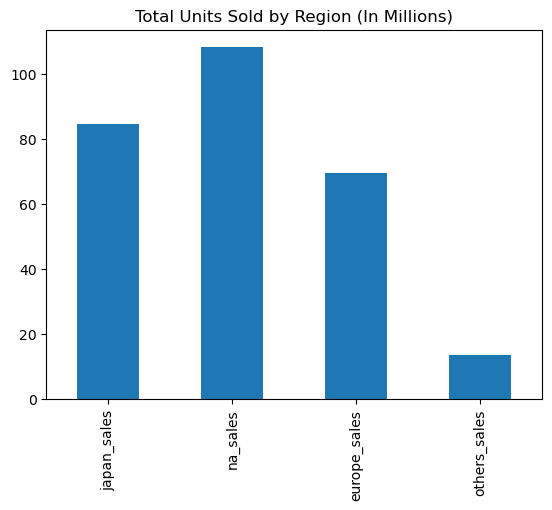

In [38]:
region_totals = pkmn_sales[sales_cols[:-1]].sum()
region_totals.plot(kind='bar', title='Total Units Sold by Region (In Millions)')

In [25]:
pkmn_sales[sales_cols].corr()

,japan_sales,na_sales,europe_sales,others_sales,total_units
japan_sales,1.000000,0.960771,0.950361,0.839121,0.981792
na_sales,0.960771,1.000000,0.979223,0.847579,0.992551
europe_sales,0.950361,0.979223,1.000000,0.854913,0.987798
others_sales,0.839121,0.847579,0.854913,1.000000,0.870534
total_units,0.981792,0.992551,0.987798,0.870534,1.000000


In [41]:
top_games = pkmn_sales.sort_values('total_units', ascending=False)[['title', 'total_units']].head(10)

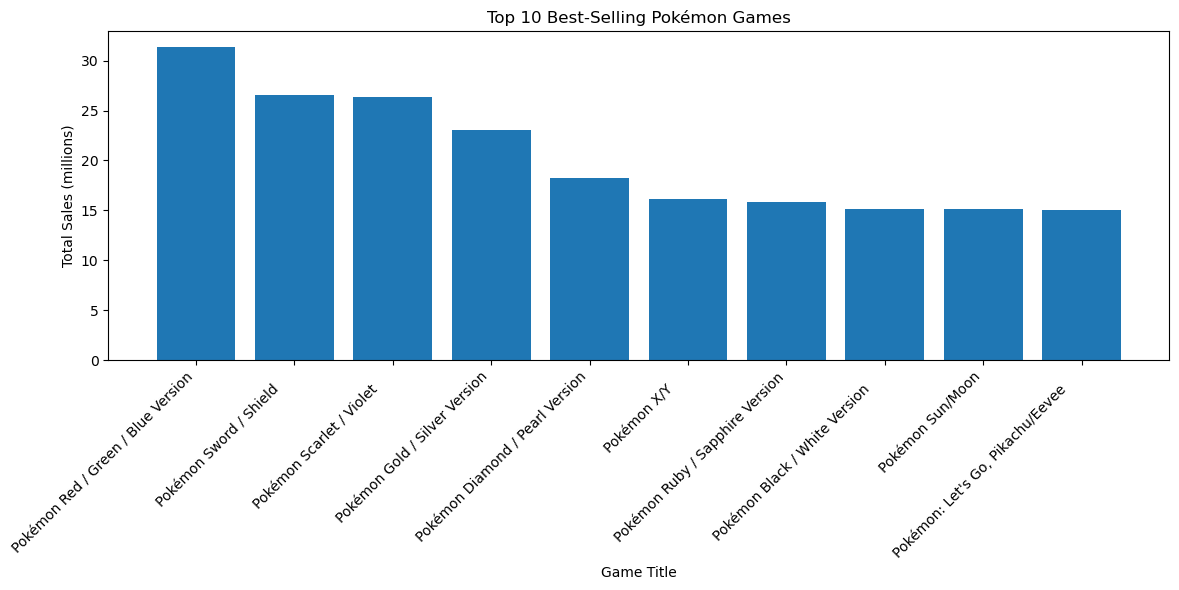

In [44]:
plt.figure(figsize=(12,6))
plt.bar(top_games['title'], top_games['total_units'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Game Title')
plt.ylabel('Total Sales (millions)')
plt.title('Top 10 Best-Selling Pokémon Games')
plt.tight_layout()
plt.show()